# Water Quality And Potability Project: By Shorya Sharma
## "An urgent call to action to accelerate progress on ensuring safe drinking water for all"

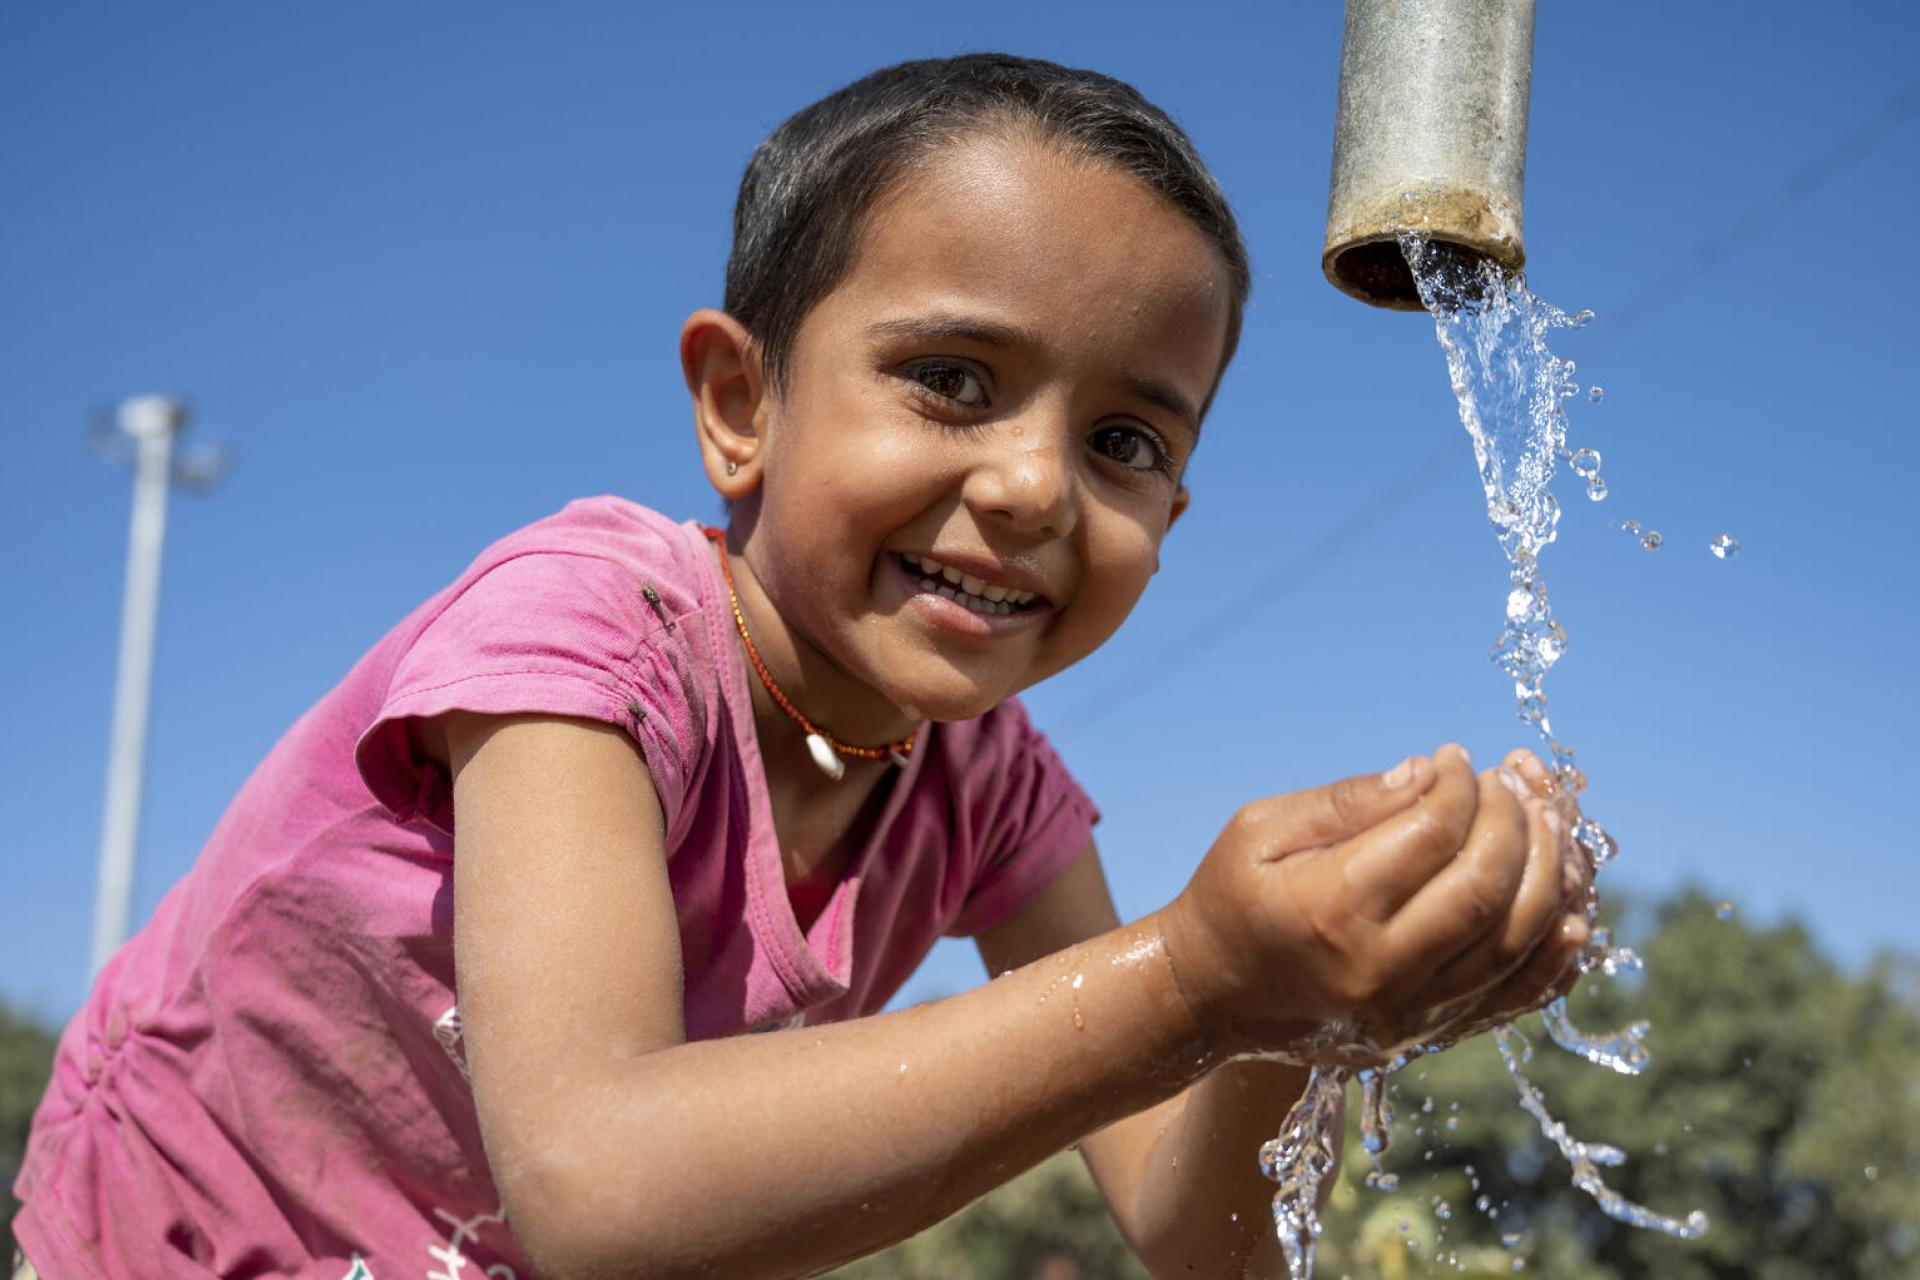

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [1]:
# Import Libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
from sklearn.impute import SimpleImputer
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost 
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Import Data
data= pd.read_csv('E:\IT Learning\My Projects\Data Science And ML Projects\Water Quality And Potability\water_potability.csv')

In [3]:
data.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [4]:
data.tail()

ph    Hardness       Solids  Chloramines     Sulfate  \
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362         NaN   
3273  9.419510  175.762646  33155.57822     7.350233         NaN   
3274  5.126763  230.603758  11983.86938     6.303357         NaN   
3275  7.874671  195.102299  17404.17706     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459761       16.140368        78.698446   2.309149           1

## Data Preprocessing:

In [5]:
data.shape

(3276, 10)

In [6]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690300     6.127421   307.699498   
50%       7.036752   196.967627  20927.833605     7.130299   333.073546   
75%       8.062066   216.667456  27332.762125     8.114887   359.950170   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792305       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [9]:
imputer=SimpleImputer(strategy= 'mean')

In [10]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [11]:
features_list= list(data.columns)
null_features= []
for feature in features_list:
    if data[feature].isnull().sum()!=0:
      null_features.append(feature)

In [12]:
null_features

['ph', 'Sulfate', 'Trihalomethanes']

In [13]:
data[null_features]=imputer.fit_transform(data[null_features])

In [14]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## EDA (Exploratory Data Analysis)

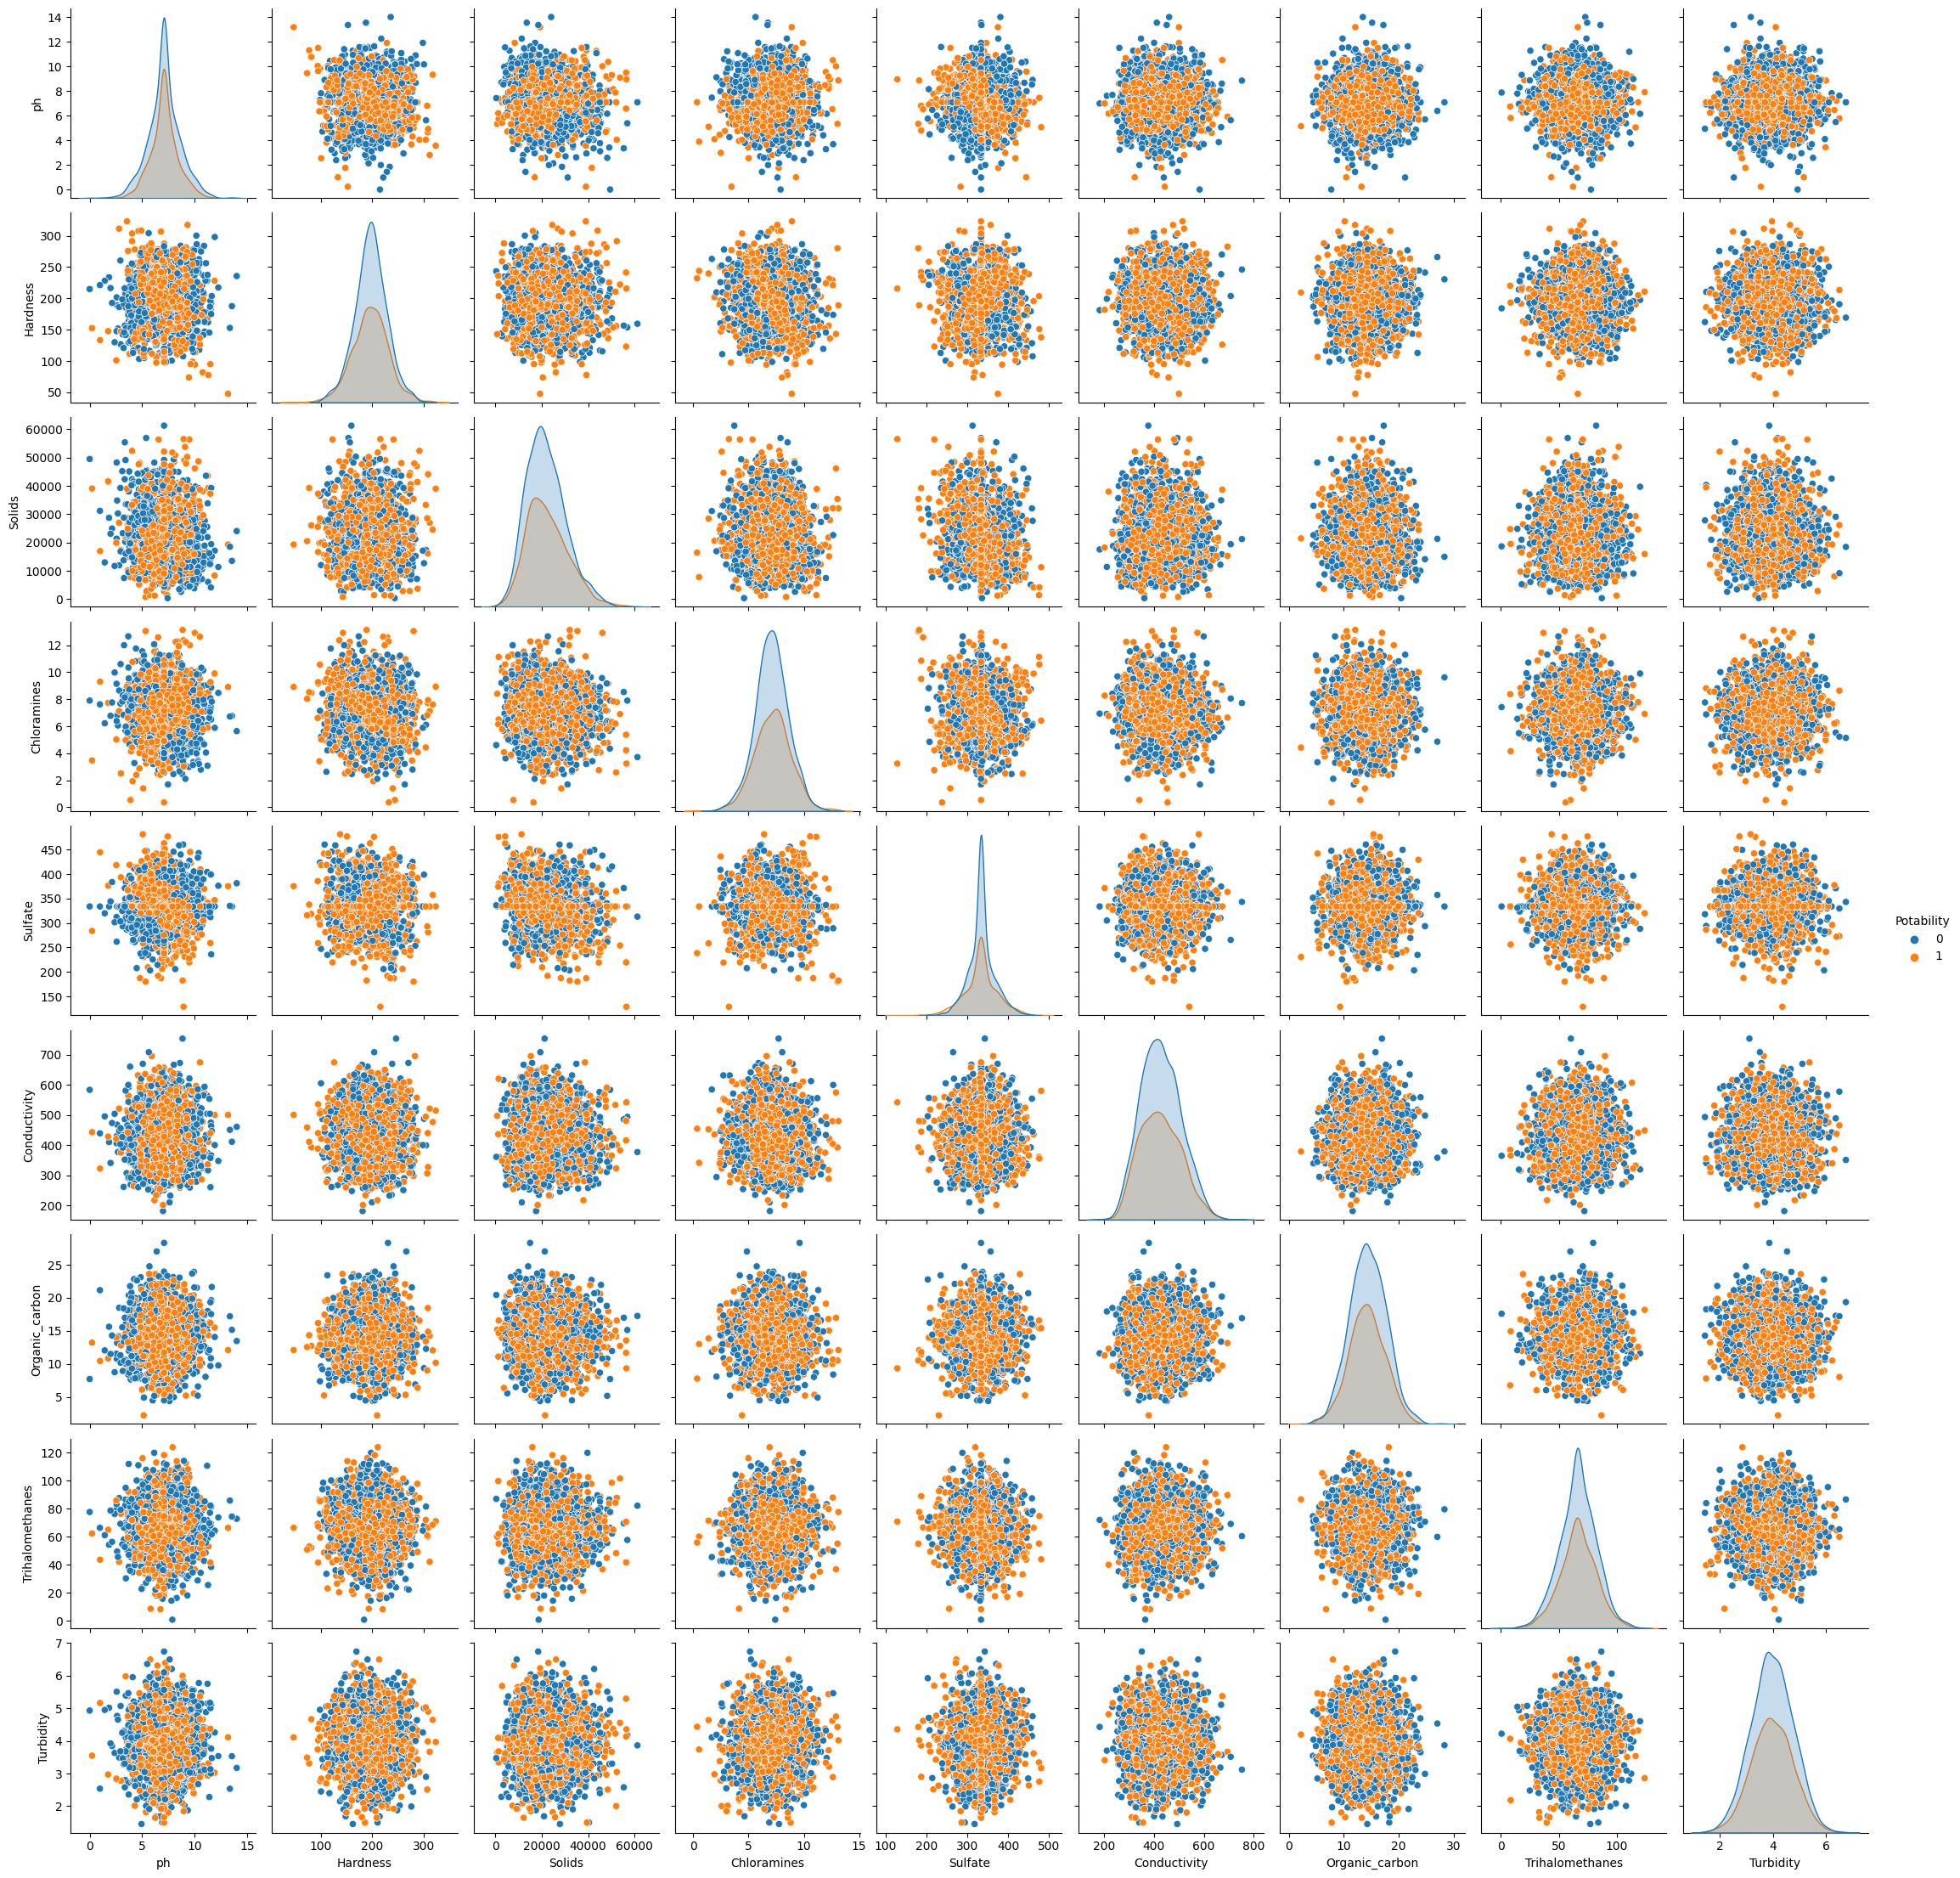

In [15]:
sns.pairplot(data,hue='Potability')

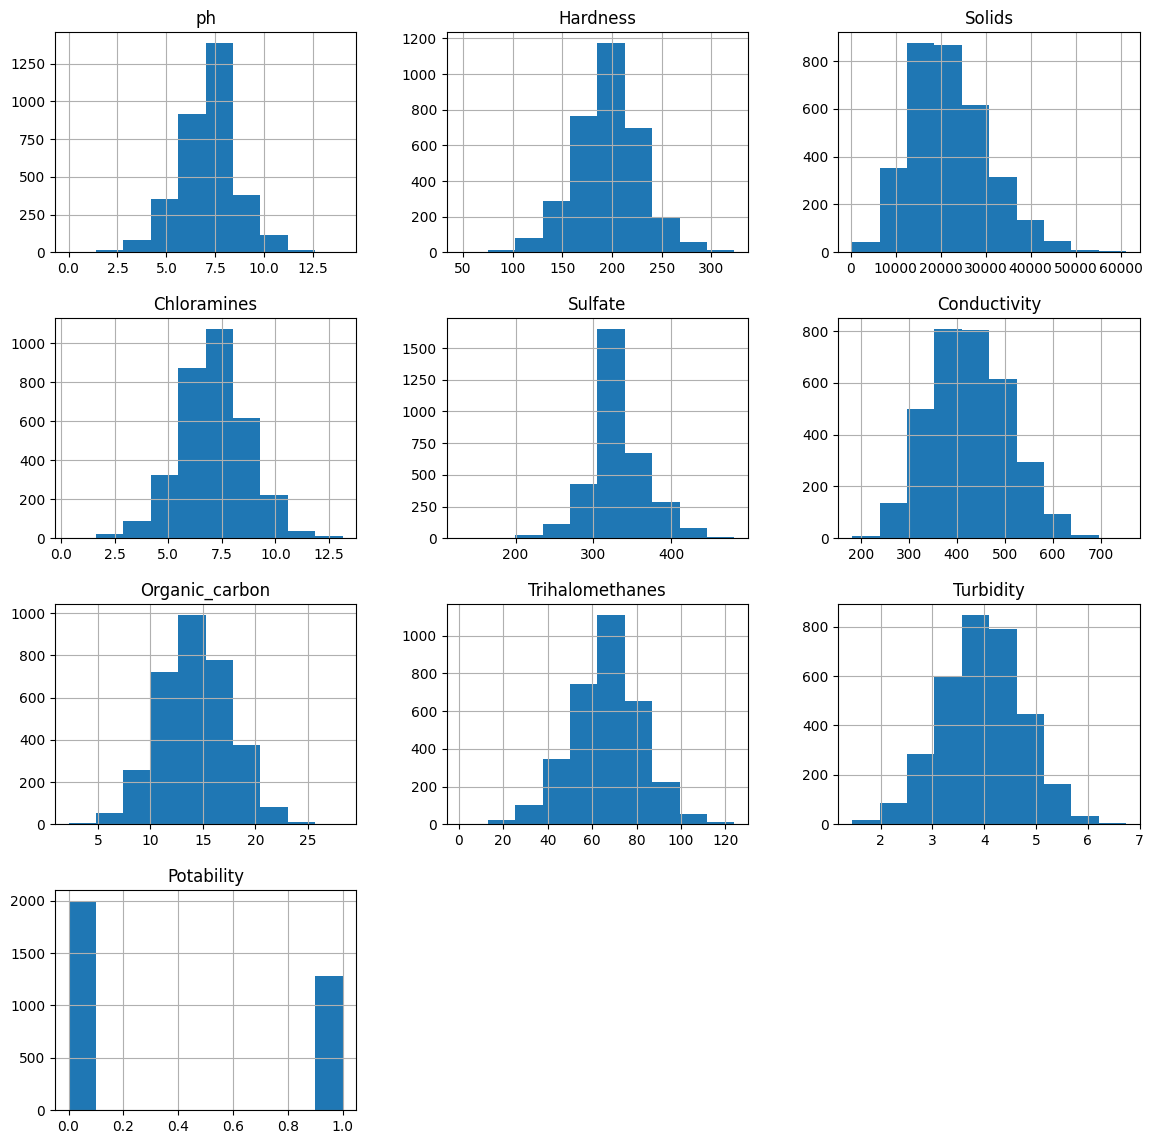

In [16]:
data.hist(figsize=(14,14))
plt.show()

In [17]:
features= data.columns[:-1]

In [18]:
features

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

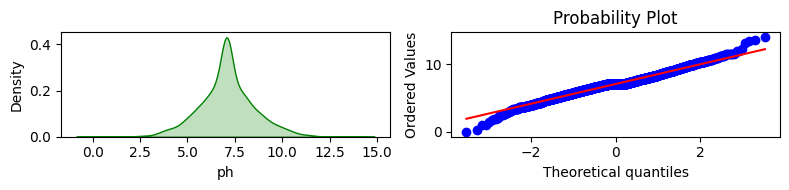

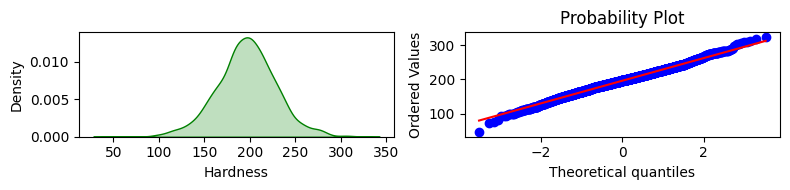

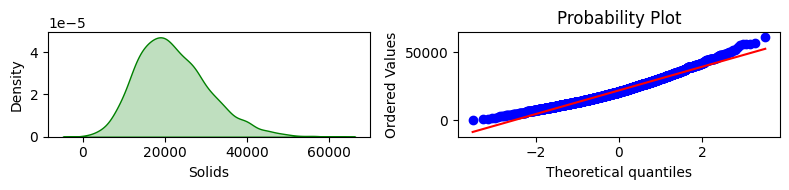

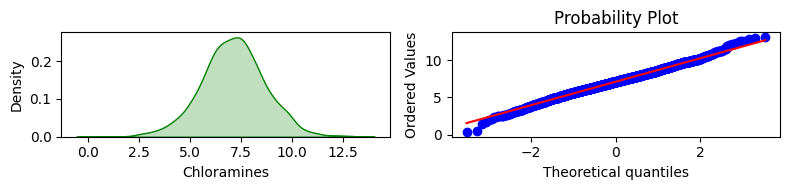

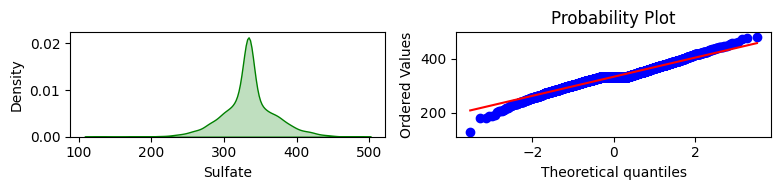

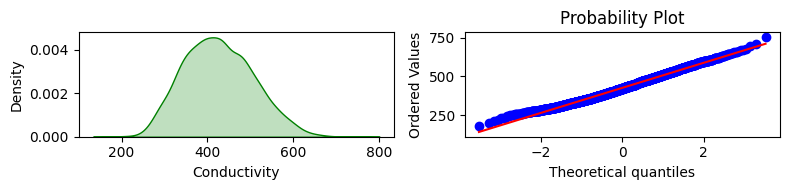

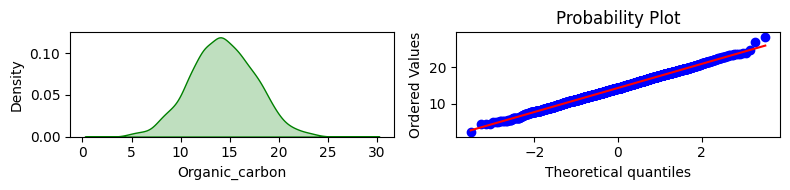

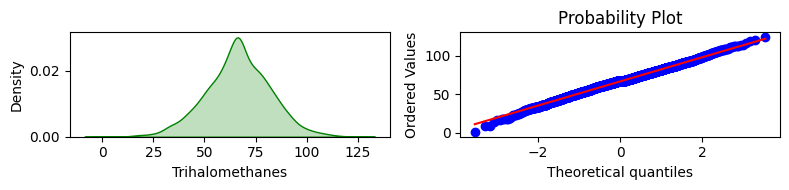

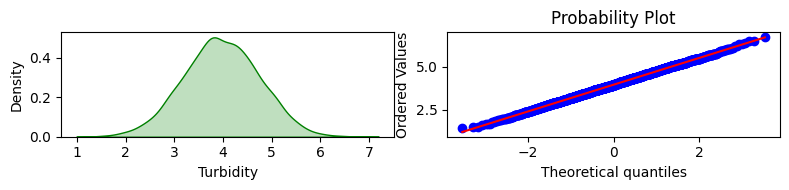

In [19]:
# To Check Data Normally Distributed or not by using QQ-PLot
for feature in features:
    plt.figure(figsize= (8,2))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature],fill= True,color='g')
    plt.subplot(1,2,2)
    stats.probplot(data[feature], dist= 'norm', plot= pylab)
    plt.tight_layout()
    plt.show()

Data is Normally Distributed. So we use z score method to find outliers in our data.

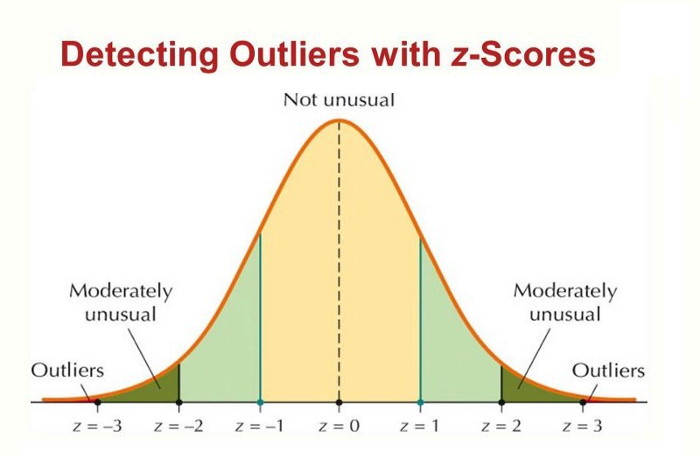

In [20]:
# Define a threshold (e.g., 3 standard deviations)
threshold= 3
# Calculate Z-scores for the entire DataFrame
z_scores = stats.zscore(data)
# Find and remove outliers
outliers = np.abs(z_scores) > threshold
data = data[~outliers.any(axis=1)]


In [21]:
data.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.54173     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [22]:
data.tail()

ph    Hardness       Solids  Chloramines     Sulfate  \
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362  333.775777   
3273  9.419510  175.762646  33155.57822     7.350233  333.775777   
3274  5.126763  230.603758  11983.86938     6.303357  333.775777   
3275  7.874671  195.102299  17404.17706     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.396293   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459761       16.140368        78.698446   2.309149           1

In [23]:
# Data Splitting in Features and Target
X= data.drop('Potability',axis=1)
y= data['Potability']

In [24]:
# Data Standardization Scaling
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)
X= pd.DataFrame(X_scaled,columns=X.columns)

<Axes: xlabel='Potability', ylabel='count'>

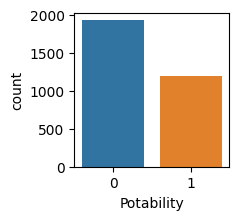

In [25]:
plt.figure(figsize=(2,2))
sns.countplot(data=data,x='Potability')

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [27]:
model= RandomForestClassifier(max_depth= 6, max_features='sqrt', min_samples_leaf= 1, 
                              min_samples_split= 3, n_estimators=500,random_state=42,n_jobs=-1,criterion= 'gini')
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=3, n_estimators=500,
                       n_jobs=-1, random_state=42)

In [28]:
Testing_Score=model.score(X_test,y_test)
Testing_Score

0.6900958466453674

In [29]:
Training_Score=model.score(X_train,y_train)
Training_Score

0.6991119005328597

In [30]:
# Create an XGBoost classifier
xgb_model = XGBClassifier(gamma= 2.5, learning_rate= 0.007, max_depth=7,n_estimator= 1000)

# Fit the model to your training data
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.007, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=1000, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [31]:
xgb_model.score(X_test,y_test)

0.7060702875399361

In [32]:
xgb_model.score(X_train,y_train)

0.7012433392539964

In [33]:
svc= SVC(C=1.0,kernel='rbf',degree=5,gamma= 'auto',random_state=42)
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.7092651757188498

In [34]:
lr= LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.6389776357827476

In [35]:
mlp= MLPClassifier(
    hidden_layer_sizes=(200, ),  # You can specify the number of hidden layers and units in each layer
    activation='relu',           # Activation function (e.g., 'relu', 'logistic', 'tanh')
    solver='adam',               # Optimization algorithm ('adam' is a good choice for most cases)
    alpha=0.0001,               # L2 regularization parameter
    batch_size=100,              # Batch size for optimization
    learning_rate='adaptive',    # Learning rate schedule ('constant' or 'adaptive')
    learning_rate_init=0.001,    # Initial learning rate
    max_iter=200,                # Maximum number of iterations
    random_state=42,             # Random seed for reproducibility    
)
mlp.fit(X_train,y_train)
mlp.score(X_test,y_test)

0.7220447284345048

# Final Results:

In [36]:
Accuracy =pd.DataFrame([
    {"Model Name": "Random Forest", "Score": model.score(X_test,y_test)},
    {"Model Name": "XGBoost", "Score":xgb_model.score(X_test,y_test) },
    {"Model Name": "SVC", "Score":svc.score(X_test,y_test) },
    {"Model Name": "MLPclassifier", "Score":mlp.score(X_test,y_test) },
    {"Model Name": "Logistic Regression ", "Score":lr.score(X_test,y_test) }
])


In [37]:
Accuracy.sort_values(by= 'Score',ascending=0)

Model Name     Score
3         MLPclassifier  0.722045
2                   SVC  0.709265
1               XGBoost  0.706070
0         Random Forest  0.690096
4  Logistic Regression   0.638978

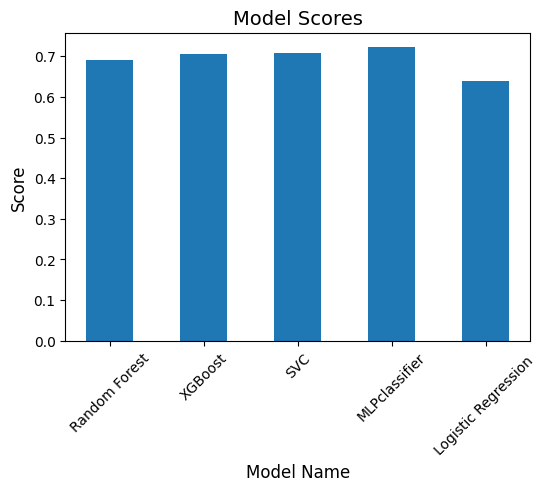

In [38]:
# Extract the 'Model Name' and 'Score' columns from the DataFrame
model_names = Accuracy['Model Name']
scores = Accuracy['Score']

# Create the bar plot
plt.figure(figsize=(6, 4))  # Set the figure size
plt.bar(model_names, scores,width=0.5)

# Set labels and title
plt.xlabel('Model Name', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Model Scores', fontsize=14)

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()
